In [1]:
import jax
import jax.numpy as jnp
import tensorflow_probability.substrates.jax as tfp
import seaborn as sns
import matplotlib.pyplot as plt
from chex import Scalar, Array, PRNGKey

from ml4wifi.utils.wifi_specs import *

tfb = tfp.bijectors
tfd = tfp.distributions

In [3]:
n_samples = 10e4
key = jax.random.PRNGKey(42)

true_distance = 20
true_snr = REFERENCE_SNR - (REFERENCE_LOSS + 10 * EXPONENT * jnp.log10(true_distance))

noisy_distance = tfb.Shift(true_distance)(distance_noise)
noisy_snr = distance_to_snr(tfb.Softplus()(noisy_distance))
noisy_rate = expected_rates_log_distance(tfb.Softplus()(noisy_distance))

In [7]:
noisy_rate.batch_shape

TensorShape([12])

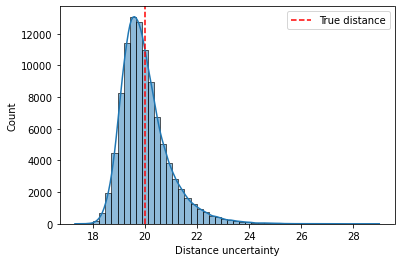

In [4]:
fig = sns.histplot(data=noisy_distance.sample(n_samples, key), kde=True, bins=50)
plt.xlabel("Distance uncertainty");
plt.axvline(true_distance, color='r', linestyle='--', label='True distance')
plt.legend()
# plt.savefig("distance.jpg", bbox_inches='tight', dpi=200)
plt.show()

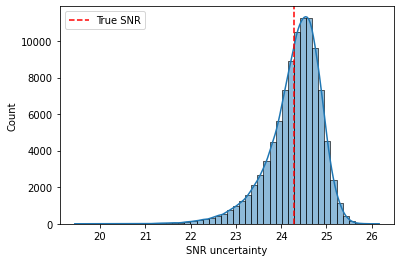

In [5]:
fig = sns.histplot(data=noisy_snr.sample(n_samples, key), kde=True, bins=50)
plt.xlabel("SNR uncertainty");
plt.axvline(true_snr, color='r', linestyle='--', label='True SNR')
plt.legend()
# plt.savefig("snr.jpg", bbox_inches='tight', dpi=200)
plt.show()

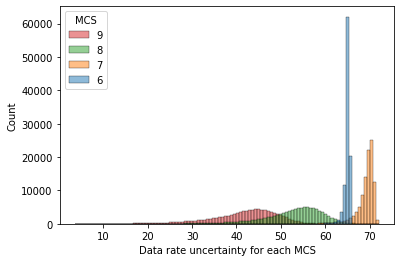

In [6]:
fig = sns.histplot(data=noisy_rate.sample(n_samples, key)[:, 6:10], bins=100, legend=False)
plt.xlabel("Data rate uncertainty for each MCS");
plt.legend(title='MCS', loc='upper left', labels=range(9, 3, -1))
# plt.savefig("rates.jpg", bbox_inches='tight', dpi=200)
plt.show()